In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('emissions.csv')

print(data.head())

print(data.dtypes)

# Use select_dtypes to distinguish between numerical and categorical data
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

print("Numerical columns:", numerical_data.columns)
print("Categorical columns:", categorical_data.columns)

   year state-name                                      sector-name  \
0  1970    Alabama              Industrial carbon dioxide emissions   
1  1970    Alabama              Industrial carbon dioxide emissions   
2  1970    Alabama              Industrial carbon dioxide emissions   
3  1970    Alabama              Industrial carbon dioxide emissions   
4  1970    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   26.721507  
1    Petroleum    3.577779  
2  Natural Gas    8.944097  
3    All Fuels   39.243383  
4    All Fuels  102.646851  
year             int64
state-name      object
sector-name     object
fuel-name       object
value          float64
dtype: object
Numerical columns: Index(['year', 'value'], dtype='object')
Categorical columns: Index(['state-name', 'sector-name', 'fuel-name'], dtype='object')


In [3]:
data

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851
...,...,...,...,...,...
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with any missing values
data_cleaned = data.dropna()

# Summarize key CO2 emission statistics by year, state, sector, and fuel type
# Group by 'year' and calculate mean, median, and range of CO2 emissions
yearly_stats = data_cleaned.groupby('year')['value'].agg(['mean', 'median', lambda x: x.max() - x.min()]).rename(columns={'<lambda>': 'range'})
print("\nYearly Statistics:\n", yearly_stats)

# Group by 'state-name' and calculate mean, median, and range of CO2 emissions
state_stats = data_cleaned.groupby('state-name')['value'].agg(['mean', 'median', lambda x: x.max() - x.min()]).rename(columns={'<lambda>': 'range'})
print("\nState Statistics:\n", state_stats)

# Group by 'sector-name' and calculate mean, median, and range of CO2 emissions
sector_stats = data_cleaned.groupby('sector-name')['value'].agg(['mean', 'median', lambda x: x.max() - x.min()]).rename(columns={'<lambda>': 'range'})
print("\nSector Statistics:\n", sector_stats)

# Group by 'fuel-name' and calculate mean, median, and range of CO2 emissions
fuel_stats = data_cleaned.groupby('fuel-name')['value'].agg(['mean', 'median', lambda x: x.max() - x.min()]).rename(columns={'<lambda>': 'range'})
print("\nFuel Type Statistics:\n", fuel_stats)

Missing values in each column:
 year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64

Yearly Statistics:
            mean    median   <lambda_0>
year                                  
1970  28.619221  3.658080  4252.119664
1971  28.777877  3.722739  4297.282820
1972  30.274129  3.913270  4516.734263
1973  31.618989  4.040850  4713.330392
1974  30.368096  3.916361  4541.830608
1975  29.990015  3.938778  4417.512146
1976  31.843595  4.133278  4686.283306
1977  32.839752  4.315105  4824.597215
1978  33.840254  4.520750  4866.074666
1979  34.124168  4.546359  4922.312524
1980  32.553408  4.019155  4749.052809
1981  31.661486  3.755045  4628.019879
1982  29.928353  3.692491  4385.177313
1983  29.892263  3.525886  4373.028366
1984  31.295973  3.815536  4598.042461
1985  31.353065  3.723872  4602.388134
1986  31.586607  3.689132  4605.298962
1987  32.563837  3.604007  4756.601201
1988  34.070463  3.817218  4984.970334
1989  34.498918  3.840302  506

In [5]:
# Printing min, Q1, median, Q3 and max (grouped by year)

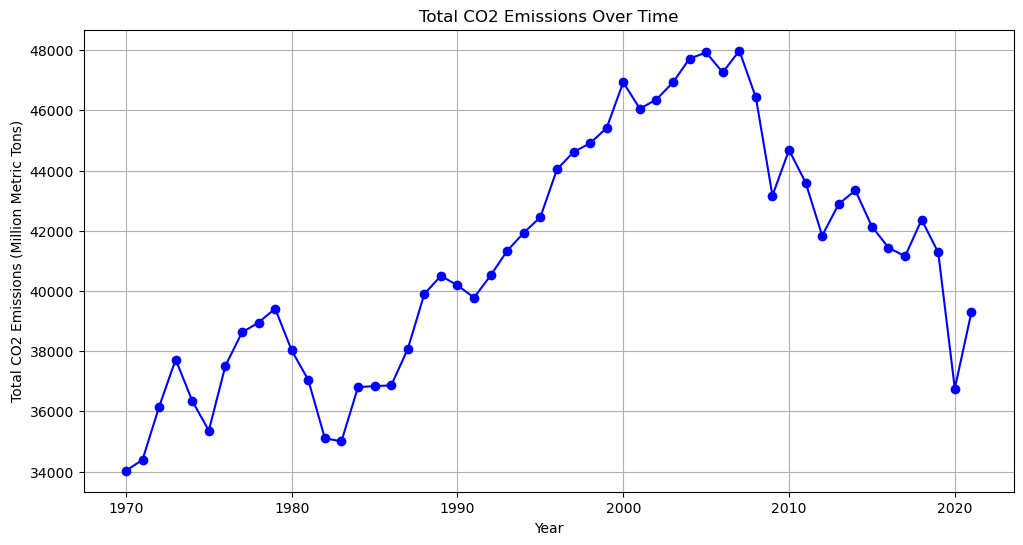

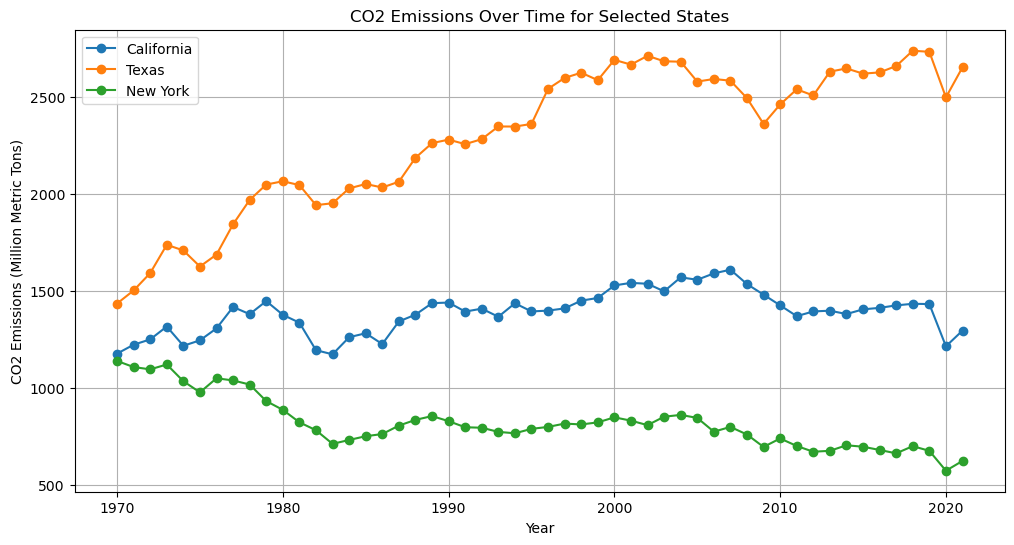

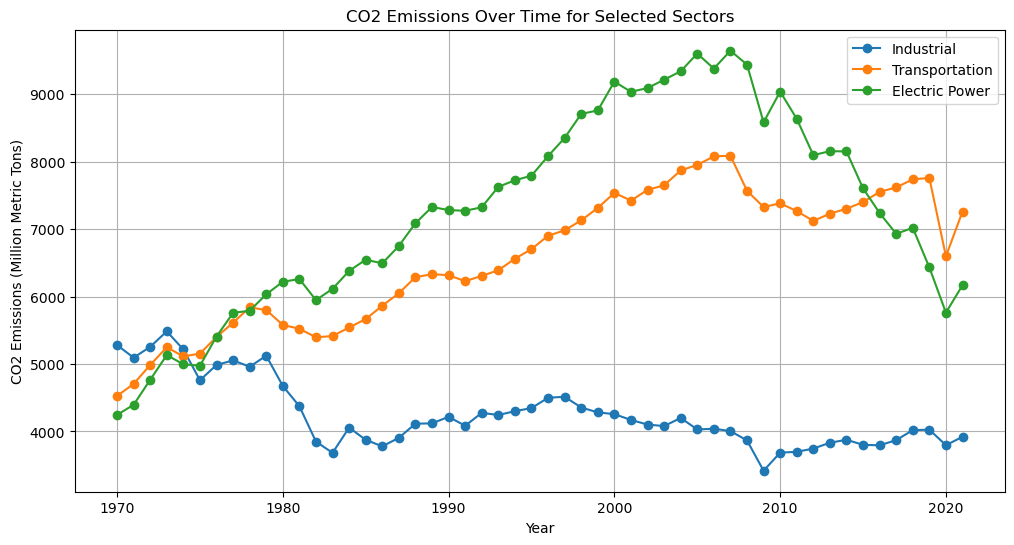

In [6]:
import matplotlib.pyplot as plt

# Analyze and visualize CO2 emission trends over time for the entire U.S.
us_emissions_over_time = data_cleaned.groupby('year')['value'].sum()

plt.figure(figsize=(12, 6))
plt.plot(us_emissions_over_time.index, us_emissions_over_time.values, marker='o', linestyle='-', color='b')
plt.title('Total CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Million Metric Tons)')
plt.grid(True)
plt.show()

# Analyze and visualize CO2 emission trends for specific states
states_to_analyze = ['California', 'Texas', 'New York']
plt.figure(figsize=(12, 6))

for state in states_to_analyze:
    state_data = data_cleaned[data_cleaned['state-name'] == state]
    state_emissions_over_time = state_data.groupby('year')['value'].sum()
    plt.plot(state_emissions_over_time.index, state_emissions_over_time.values, marker='o', linestyle='-', label=state)

plt.title('CO2 Emissions Over Time for Selected States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.legend()
plt.grid(True)
plt.show()

# Analyze and visualize CO2 emission trends for specific sectors
sectors_to_analyze = ['Industrial', 'Transportation', 'Electric Power']
plt.figure(figsize=(12, 6))

for sector in sectors_to_analyze:
    sector_data = data_cleaned[data_cleaned['sector-name'].str.contains(sector)]
    sector_emissions_over_time = sector_data.groupby('year')['value'].sum()
    plt.plot(sector_emissions_over_time.index, sector_emissions_over_time.values, marker='o', linestyle='-', label=sector)

plt.title('CO2 Emissions Over Time for Selected Sectors')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.legend()
plt.grid(True)
plt.show()

States with the highest CO2 emissions:
 state-name
Ohio             5.253161e+04
Pennsylvania     5.537237e+04
California       7.222241e+04
Texas            1.194107e+05
United States    1.067386e+06
Name: value, dtype: float64
States with the lowest CO2 emissions:
 state-name
District of Columbia    1041.070576
Vermont                 1206.996891
Rhode Island            2253.404875
South Dakota            2649.870926
Idaho                   2900.391559
Name: value, dtype: float64
Sectors with the highest CO2 emissions:
 sector-name
Residential carbon dioxide emissions               7.757932e+04
Industrial carbon dioxide emissions                2.210039e+05
Transportation carbon dioxide emissions            3.421856e+05
Electric Power carbon dioxide emissions            3.773147e+05
Total carbon dioxide emissions from all sectors    1.067647e+06
Name: value, dtype: float64
Sectors with the lowest CO2 emissions:
 sector-name
Commercial carbon dioxide emissions         49563.499434
Res

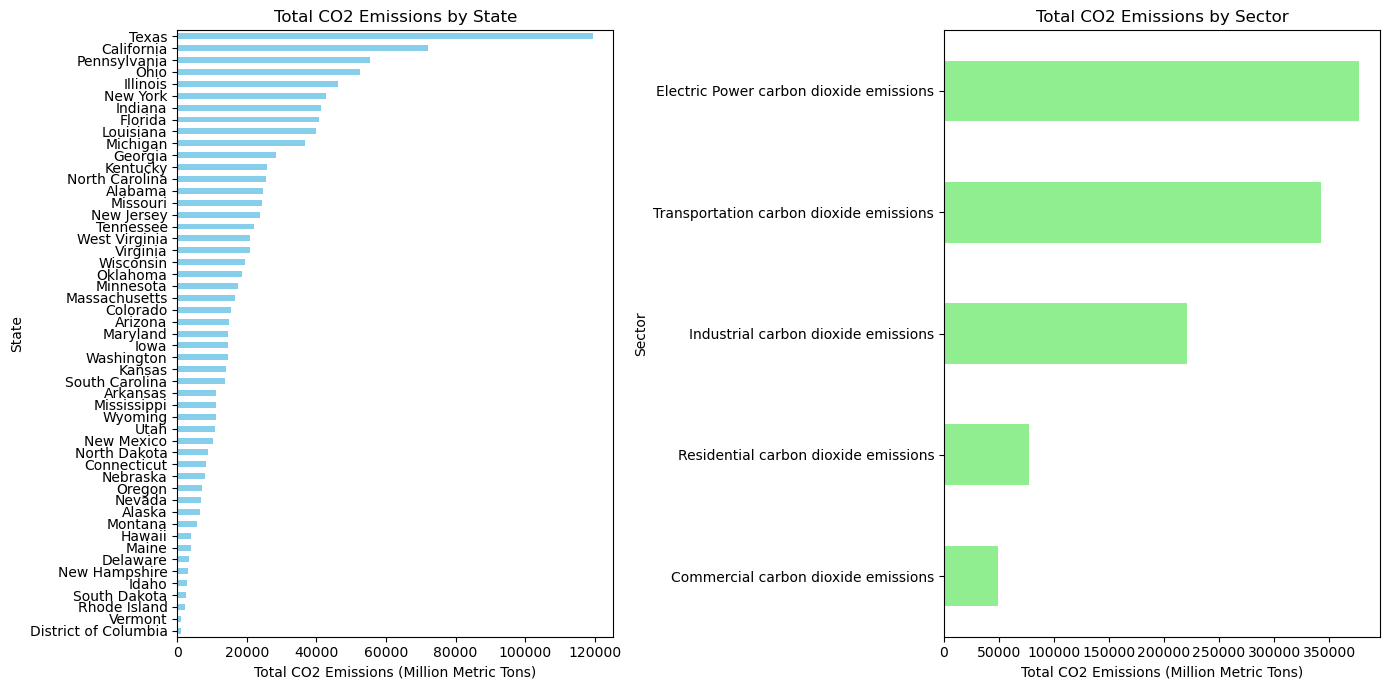

In [7]:
# Analyzing CO2 emissions across states and sectors to identify highest and lowest emissions

# Grouping data by state and calculating total emissions for each state
state_total_emissions = data_cleaned.groupby('state-name')['value'].sum().sort_values()

# Displaying states with the highest and lowest total CO2 emissions
print("States with the highest CO2 emissions:\n", state_total_emissions.tail(5))
print("States with the lowest CO2 emissions:\n", state_total_emissions.head(5))

# Grouping data by sector and calculating total emissions for each sector
sector_total_emissions = data_cleaned.groupby('sector-name')['value'].sum().sort_values()

# Displaying sectors with the highest and lowest total CO2 emissions
print("Sectors with the highest CO2 emissions:\n", sector_total_emissions.tail(5))
print("Sectors with the lowest CO2 emissions:\n", sector_total_emissions.head(5))

# Filter out 'United States' from the DataFrame
state_total_emissions = state_total_emissions[state_total_emissions.index != 'United States']

# Visualizing the data for better understanding
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
state_total_emissions.plot(kind='barh', color='skyblue')
plt.title('Total CO2 Emissions by State')
plt.xlabel('Total CO2 Emissions (Million Metric Tons)')
plt.ylabel('State')


# Filter out 'Total carbon dioxide emissions from all sectors' from the DataFrame
sector_total_emissions = sector_total_emissions[sector_total_emissions.index != 'Total carbon dioxide emissions from all sectors']

# Visualizing the data for better understanding
plt.subplot(1, 2, 2)
sector_total_emissions.plot(kind='barh', color='lightgreen')
plt.title('Total CO2 Emissions by Sector')
plt.xlabel('Total CO2 Emissions (Million Metric Tons)')
plt.ylabel('Sector')

plt.tight_layout()
plt.show()

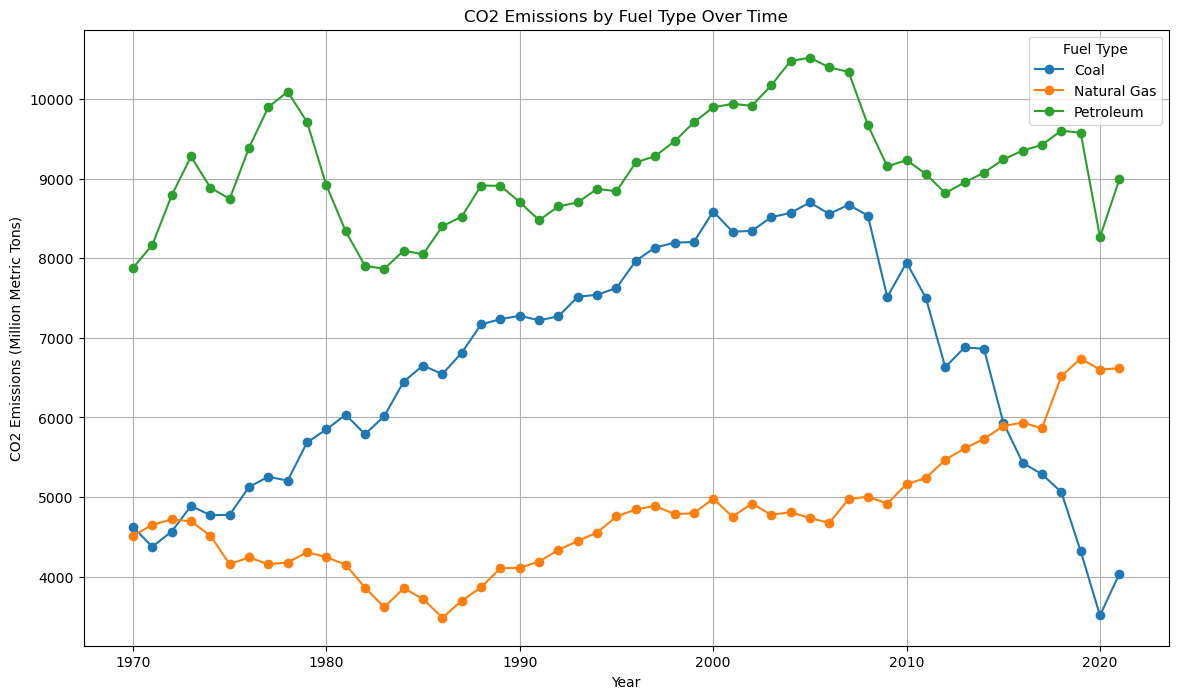

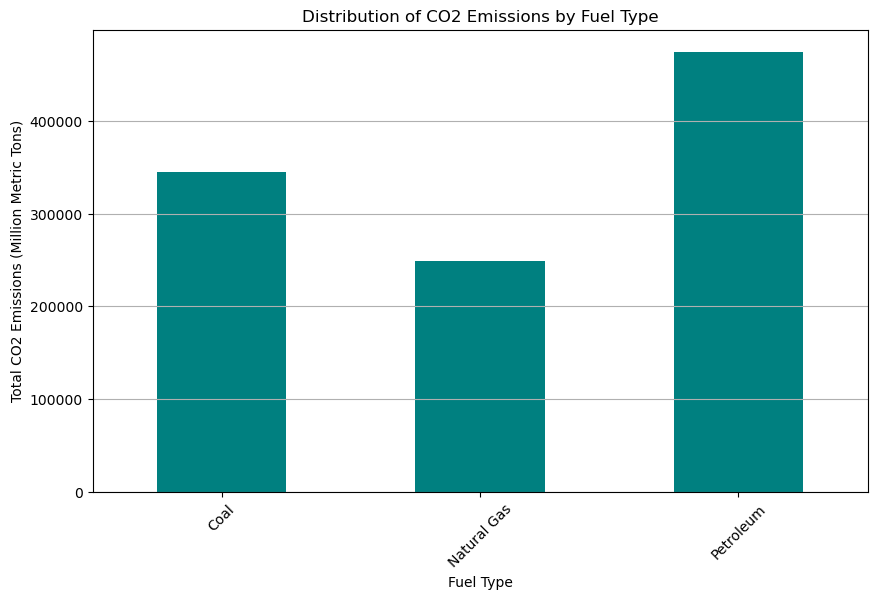

In [8]:
# Analyzing the distribution and trends of CO2 emissions by fuel type over time

# Grouping data by 'year' and 'fuel-name' to analyze trends over time for each fuel type
fuel_trends = data_cleaned.groupby(['year', 'fuel-name'])['value'].sum().unstack()

# Analyzing the distribution of emissions by fuel type
fuel_distribution = data_cleaned.groupby('fuel-name')['value'].sum()

# Filter out 'All Fuels' from the DataFrame
fuel_trends = fuel_trends.loc[:, fuel_trends.columns != 'All Fuels']
fuel_distribution = fuel_distribution[fuel_distribution.index != 'All Fuels']

# Plotting the trends for each fuel type
plt.figure(figsize=(14, 8))
for fuel in fuel_trends.columns:
    plt.plot(fuel_trends.index, fuel_trends[fuel], label=fuel, marker='o')

plt.title('CO2 Emissions by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

# Plotting the distribution of emissions by fuel type
plt.figure(figsize=(10, 6))
fuel_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total CO2 Emissions (Million Metric Tons)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

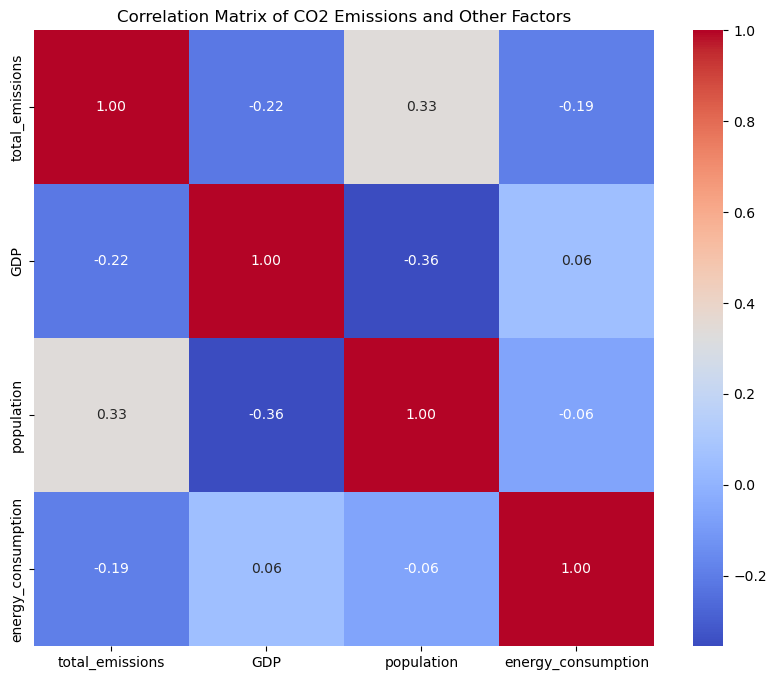

In [9]:
# Import necessary libraries for correlation analysis
import seaborn as sns

# Assume we have additional data for GDP, population, and energy consumption loaded into DataFrame
# For demonstration, let's create some mock data
np.random.seed(0)
years = data_cleaned['year'].unique()
mock_gdp = np.random.normal(loc=10000, scale=1000, size=len(years))
mock_population = np.random.normal(loc=10, scale=1, size=len(years))
mock_energy_consumption = np.random.normal(loc=500, scale=50, size=len(years))

# Create a DataFrame for these mock data
additional_data = pd.DataFrame({
    'year': years,
    'GDP': mock_gdp,
    'population': mock_population,
    'energy_consumption': mock_energy_consumption
})

# Merge this with our emissions data on 'year'
total_emissions_per_year = data_cleaned.groupby('year')['value'].sum().reset_index()
total_emissions_per_year.rename(columns={'value': 'total_emissions'}, inplace=True)
analysis_data = pd.merge(total_emissions_per_year, additional_data, on='year')

# Calculate correlations
correlation_matrix = analysis_data[['total_emissions', 'GDP', 'population', 'energy_consumption']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of CO2 Emissions and Other Factors')
plt.show()